In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for data analysis
import pandas_profiling as profile
import dabl

# for interactive widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
# lets import the dataset
data = pd.read_csv('iris.csv')

# lets check the shape of the dataset
data.shape

(150, 6)

In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Target looks like classification
Linear Discriminant Analysis training set score: 0.980


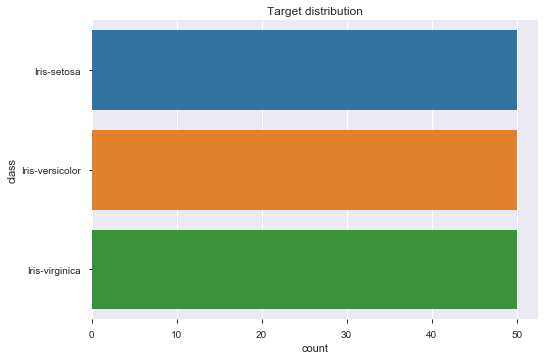

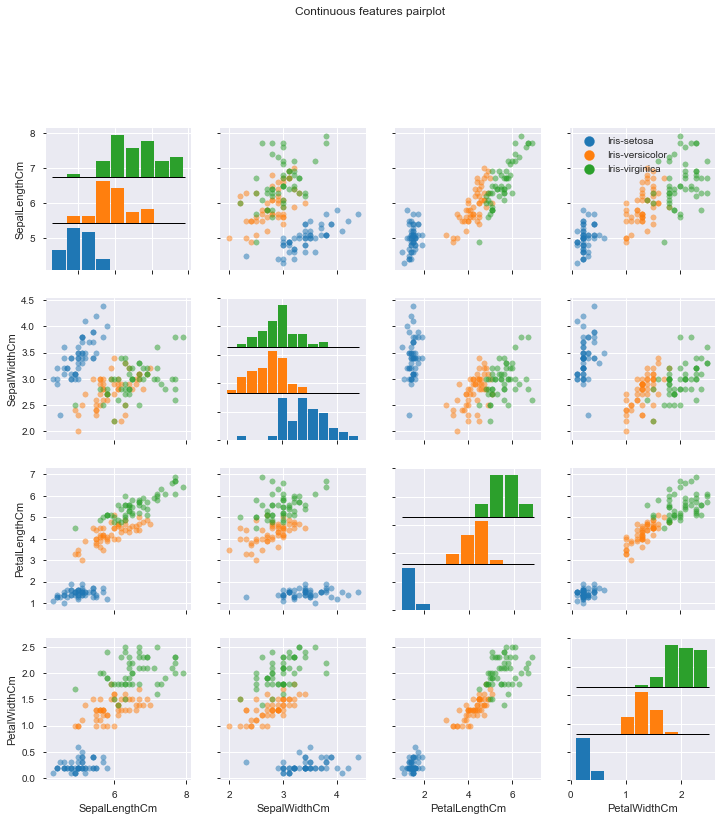

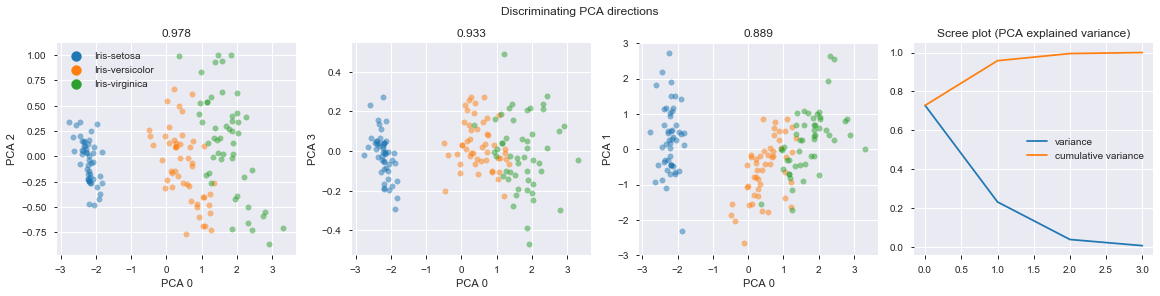

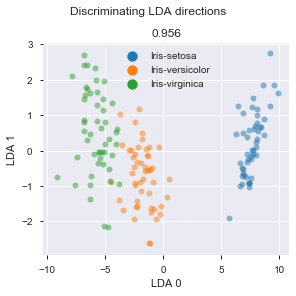

In [5]:
dabl.plot(data, target_col = 'Species')

## Descriptive Statistics

In [6]:
x = data.describe()
x.iloc[1:,1:].style.background_gradient(cmap = 'Wistia')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,5.84333,3.054,3.75867,1.19867
std,0.828066,0.433594,1.76442,0.763161
min,4.3,2,1,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3,4.35,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


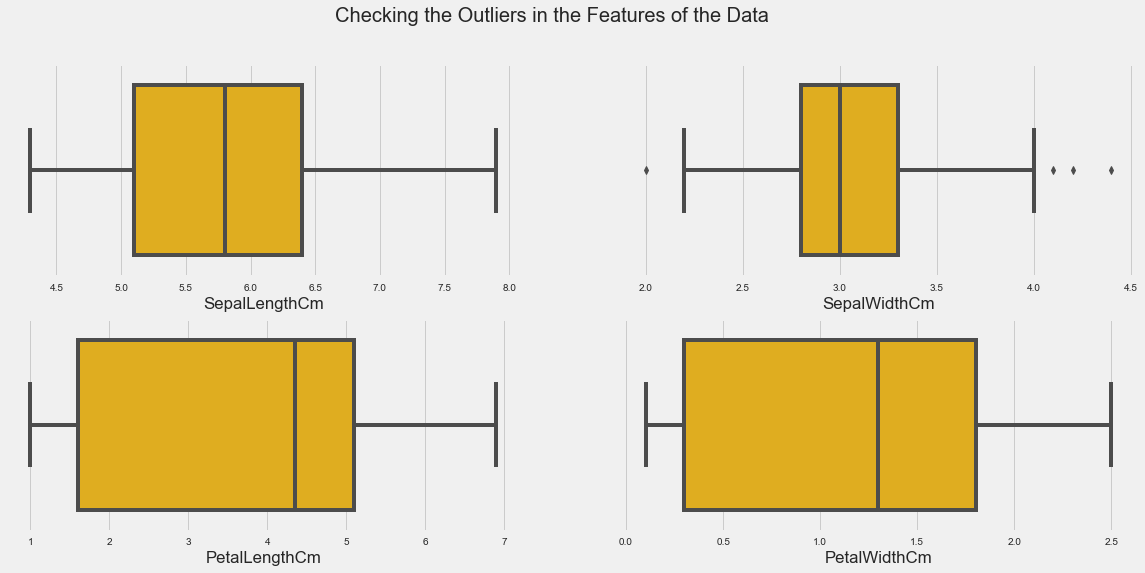

In [7]:
# outliers

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
sns.boxplot(data['SepalLengthCm'], palette = 'Wistia')

plt.subplot(2, 2, 2)
sns.boxplot(data['SepalWidthCm'],  palette = 'Wistia')

plt.subplot(2, 2, 3)
sns.boxplot(data['PetalLengthCm'],  palette = 'Wistia')

plt.subplot(2, 2, 4)
sns.boxplot(data['PetalWidthCm'],  palette = 'Wistia')

plt.suptitle('Checking the Outliers in the Features of the Data', fontsize = 20)
plt.show()

In [8]:
# lets check the percentage of missing values

percentage_of_missing_data = data.isnull().sum()/data.shape[0]
print(percentage_of_missing_data)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [12]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

## Inferential Statistics

In [22]:
# lets find the probability of getting verginica

x = data[data['Species'] == 'Iris-virginica'].shape[0]
probability_of_getting_virginica = x/data.shape[0]
print("The Probability of getting a Virginica is {0:.2f} %".format(probability_of_getting_virginica*100))

The Probability of getting a Virginica is 33.33 %


In [36]:
# Checking the Range of Features

petal_length = data['PetalLengthCm'].max() - data['PetalLengthCm'].min()
print(petal_length)
petal_width = data['PetalWidthCm'].max() - data['PetalWidthCm'].min()
print(petal_width)
sepal_length = data['SepalLengthCm'].max() - data['SepalLengthCm'].min()
print(sepal_length)
sepal_width = data['SepalWidthCm'].max() - data['SepalWidthCm'].min()
print(sepal_width)

5.9
2.4
3.6000000000000005
2.4000000000000004


## Data Visualization

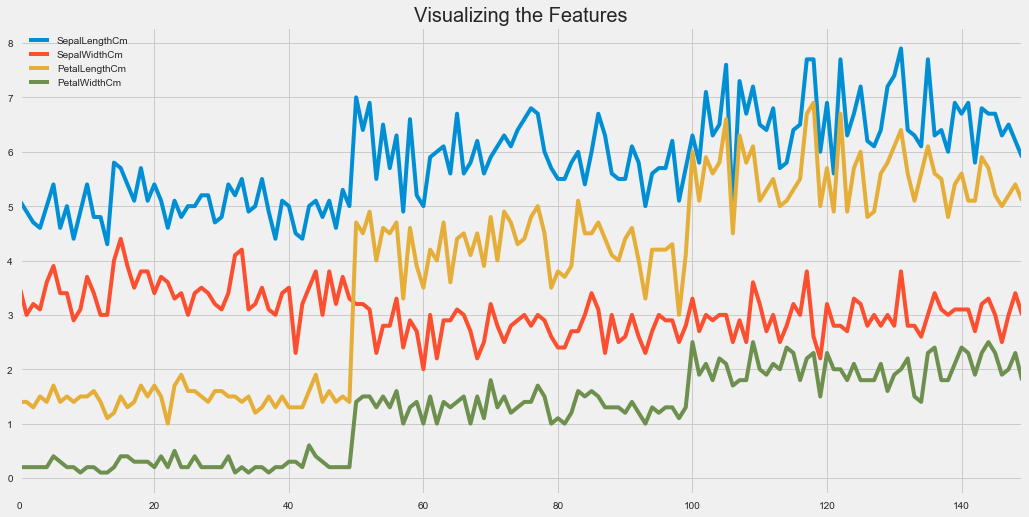

In [37]:
plt.rcParams['figure.figsize'] = (16, 8)
data.iloc[:,1:].plot()
plt.title('Visualizing the Features', fontsize = 20)
plt.show()

## Data Preparation

In [40]:
# separation of target column

target = data['Species']
features = data.drop(['Id','Species'], axis = 1)

# cheking the shape 
print("Target :", target.shape)
print("Features :", features.shape)

Target : (150,)
Features : (150, 4)


In [41]:
# lets split the features and target into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# checking the shapes
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test :", y_test.shape)

X_train : (120, 4)
X_test : (30, 4)
Y_train : (120,)
Y_test : (30,)


In [42]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modelling

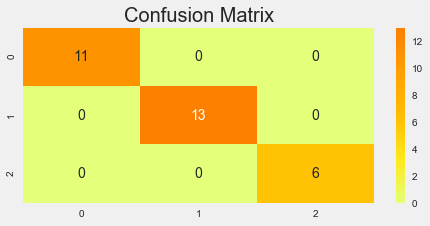

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (7, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()